In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Top U.S. Locations Filtered by Postings Count

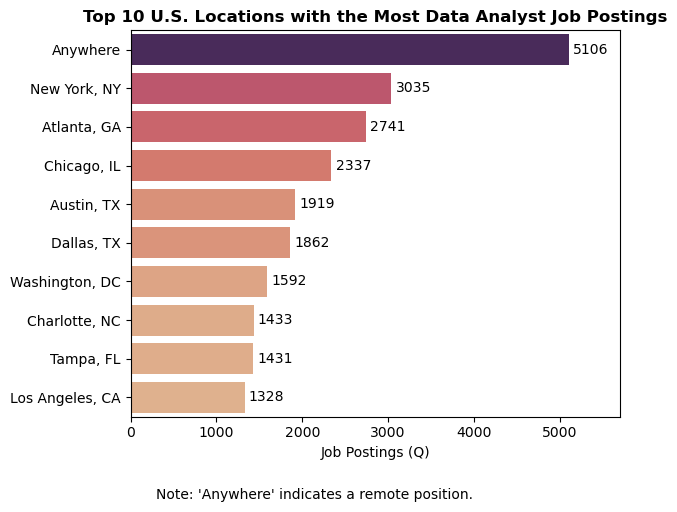

In [3]:
# Filtered by United States and Data Analyst Role
df_da_US = df[(df["job_country"] == "United States") & (df["job_title_short"] == "Data Analyst")].copy()

# Filtered by location and stored in a DataFrame to make plotting easier.
df_plot = df_da_US["job_location"].value_counts().head(10).to_frame()

# Plotting
ax = sns.barplot(data=df_plot, x="count", y="job_location", hue="count", palette="flare", legend=False)
plt.ylabel(""), plt.xlabel("Job Postings (Q)"), plt.title("Top 10 U.S. Locations with the Most Data Analyst Job Postings", weight="bold")
plt.figtext(0.5, -0.05, "Note: 'Anywhere' indicates a remote position.", ha="center", fontsize=10)
for index, value in enumerate(df_plot["count"]):
    ax.text(value + 50, index, str(value), color='black', ha="left", va="center")
ax.set_xlim(0, 5700)
plt.tight_layout()
plt.show()

# Benefits

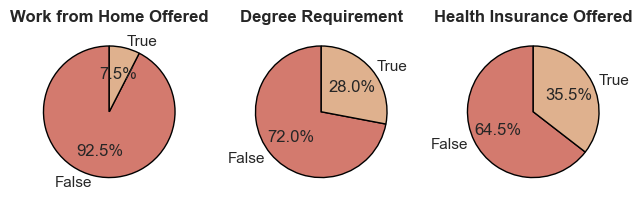

In [ ]:
# Titles for pie charts
dict_column = {"job_work_from_home": "Work from Home Offered",
               "job_no_degree_mention": "Degree Requirement",
               "job_health_insurance": "Health Insurance Offered"}

# Plotting parameters
fig, ax = plt.subplots(1,3)
colors = ["#D37A6E", "#DFB18E"]

# Plotting
for i, (column, title) in enumerate(dict_column.items()):
    wedges, texts, autotexts = ax[i].pie(df_da_US[column].value_counts(),
                                         labels=["False", "True"], autopct="%1.1f%%",
                                         startangle=90, colors=colors,
                                         wedgeprops={"edgecolor": "black", "linewidth": 1})
    ax[i].set_title(title, fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

# Most Relevant Companies

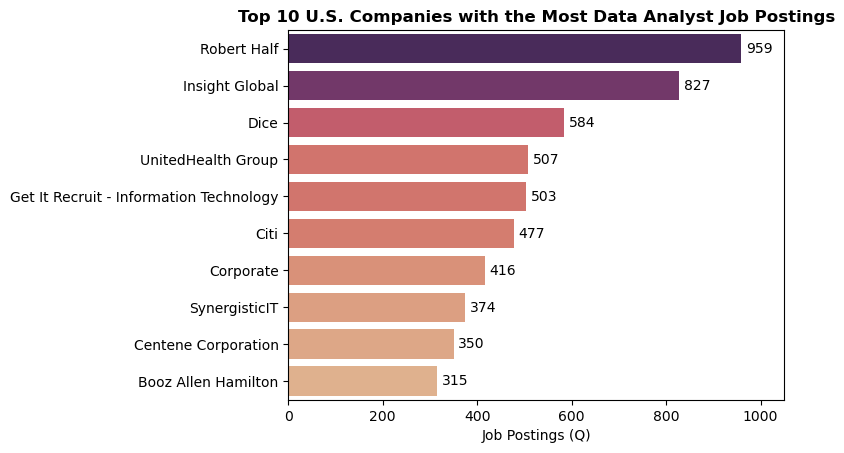

In [5]:
# Filtered by United States and Data Analyst Role
df_da_US = df[(df["job_country"] == "United States") & (df["job_title_short"] == "Data Analyst")].copy()

# Filtered by location and stored in a DataFrame to make plotting easier.
df_plot = df_da_US["company_name"].value_counts().head(10).to_frame()

# Plotting
ax = sns.barplot(data=df_plot, x="count", y="company_name", hue="count", palette="flare", legend=False)
plt.ylabel(""), plt.xlabel("Job Postings (Q)"), plt.title("Top 10 U.S. Companies with the Most Data Analyst Job Postings", weight="bold")
for index, value in enumerate(df_plot["count"]):
    ax.text(value + 10, index, str(value), color='black', ha="left", va="center")
ax.set_xlim(0, 1050)
plt.show()